# [LAB 01] 비지도 학습 > 군집분석 >K MEANS > BaseModel

## 01. 준비작업
### [1] 패키지 가져오기

In [1]:
# intel cpu 인 경우 하드웨어 가속 사용 가능
# from sklearnex import patch_sklearn
# patch_sklearn()

In [7]:
from hossam import load_data
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull
from sklearn.preprocessing import MinMaxScaler , StandardScaler

### [2] 데이터 가져오기 - 게임 유저 군집화

In [8]:
origin = load_data('game_usage')
origin.head()

[data] https://data.hossam.kr/mldata/game_usage.xlsx
[desc] 게임 이용시간(time spent)과 레벨(game level)에 대한 가상 데이터
[!] Cannot read metadata


,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109


## 02. 데이터 살펴보기
### [1] 게임 이용자의 시간과 레벨 분포 확인

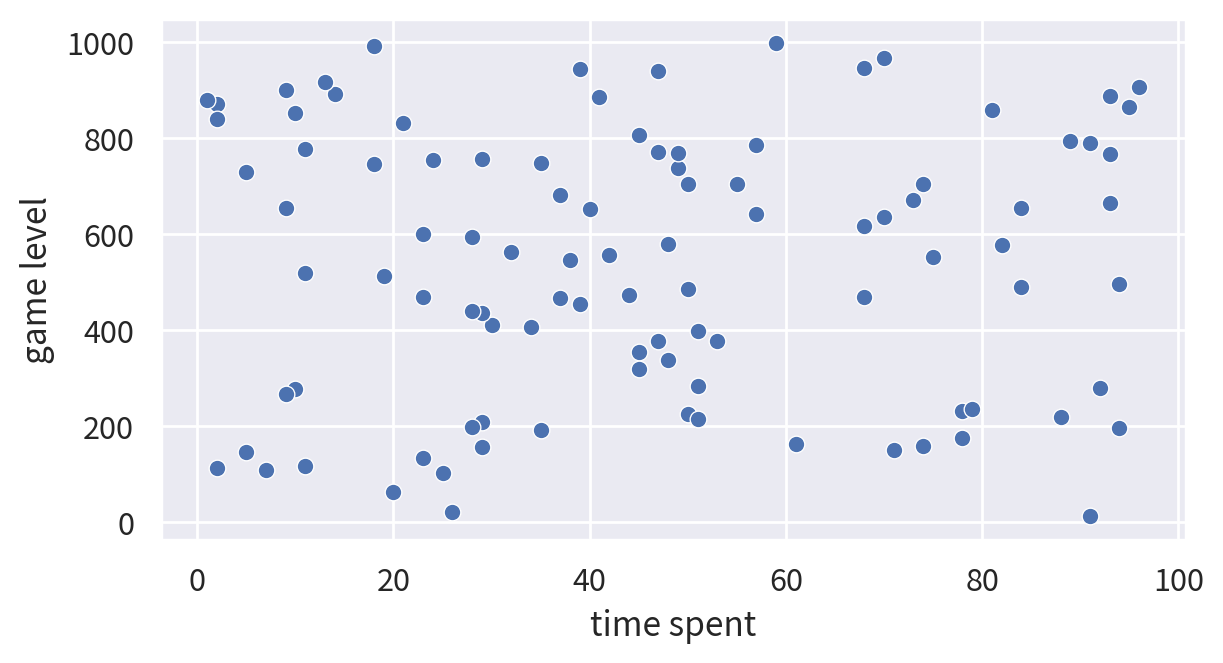

In [11]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Scatter Plot 그리기
sb.scatterplot(data=origin, x='time spent', y='game level')

# 3) 그래프 꾸미기
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


## 03. 그룹으로 묶어보자
### [1] 머신러닝 학습시키기

- 오래해서 잘하는 애
- 오래했는데도 못하는애
- 잠깐 했는데도 잘하는애
- 잠간해서 못하는애

In [13]:
# 모델 객체 생성
estimator = KMeans(n_clusters=4)

#모델을 학습시킴
estimator.fit(origin)

#예측
cluster_pred = estimator.predict(origin)
cluster_pred

array([1, 2, 1, 1, 0, 1, 3, 3, 0, 3, 1, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 0, 1, 2, 0, 3, 2, 2, 1, 3, 0, 1, 2, 3, 0, 0, 1, 3, 1, 1, 2,
       1, 2, 1, 3, 1, 0, 3, 0, 0, 0, 3, 1, 0, 2, 1, 3, 0, 2, 2, 2, 3, 1,
       3, 0, 3, 2, 1, 3, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 3, 1, 0, 2, 1, 3,
       0, 0, 1, 2, 3, 2, 1, 1, 3, 1, 0, 3], dtype=int32)

### [2] 결과를 도표 형식으로 정리

In [17]:
df = origin.copy()
df['그룹번호'] = cluster_pred
df

,time spent,game level,그룹번호
0,39,944,1
1,55,705,2
2,29,757,1
3,59,999,1
4,7,109,0
...,...,...,...
95,47,939,1
96,50,485,3
97,13,916,1
98,79,235,0


### [3] 결과 시각화

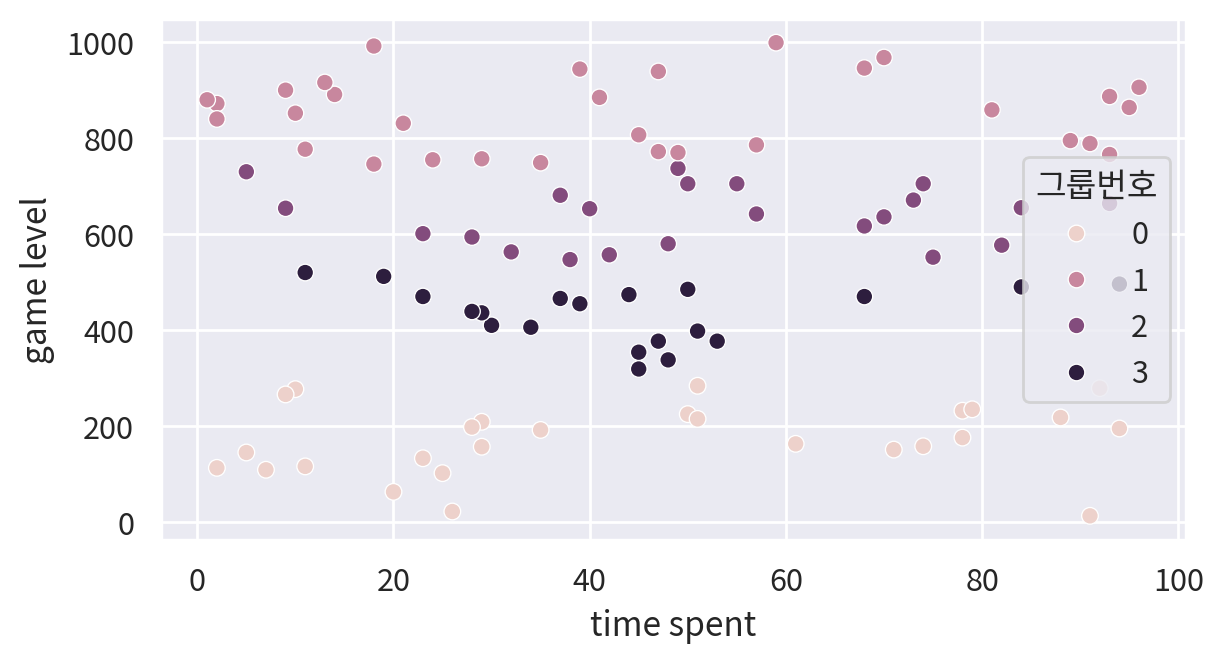

In [19]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) Scatter Plot 그리기
sb.scatterplot(data=df, x='time spent', y='game level', hue = '그룹번호')

# 3) 그래프 꾸미기
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### [3] 결과 시각화 (고급)

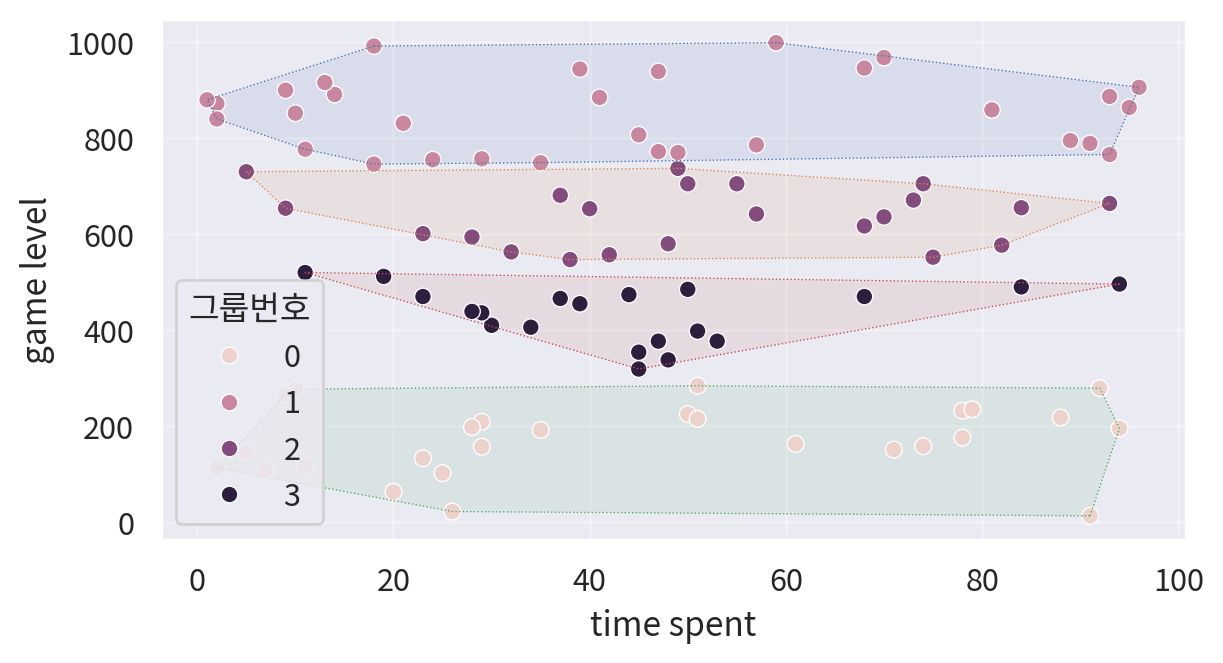

In [22]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


# 군집별 값의 종류별로 반복문 실행
for c in df['그룹번호'].unique():
  #값의 종류별로 데이터 프레임 구분
  df_c = df.loc[df['그룹번호'] == c , ['time spent','game level']]

  try:
    #외각선 좌표 계산
    hull = ConvexHull(df_c)

    #마지막 좌표 이후에 첫번쨰 좌표를 연결
    points = np.append(hull.vertices,hull.vertices[0])

    ax.plot( #type:ignore
      df_c.iloc[points,0] , df_c.iloc[points,1] , linewidth = 0.5 , linestyle =':'
      )
    
    ax.fill(df_c.iloc[points,0] , df_c.iloc[points ,1], alpha =0.1)


  except:
    pass


sb.scatterplot(data=df , x= 'time spent' , y='game level' , hue = '그룹번호')
ax.grid(True ,alpha =0.3) #배경 격자 표시
plt.tight_layout()
plt.show()
plt.close()

### #04. 데이터 표준화 적용
#### [1] 표준화 되지 않은 원본 데이터를 x 와 y 축에 대하여 같은 범위로 설정하고 시각화

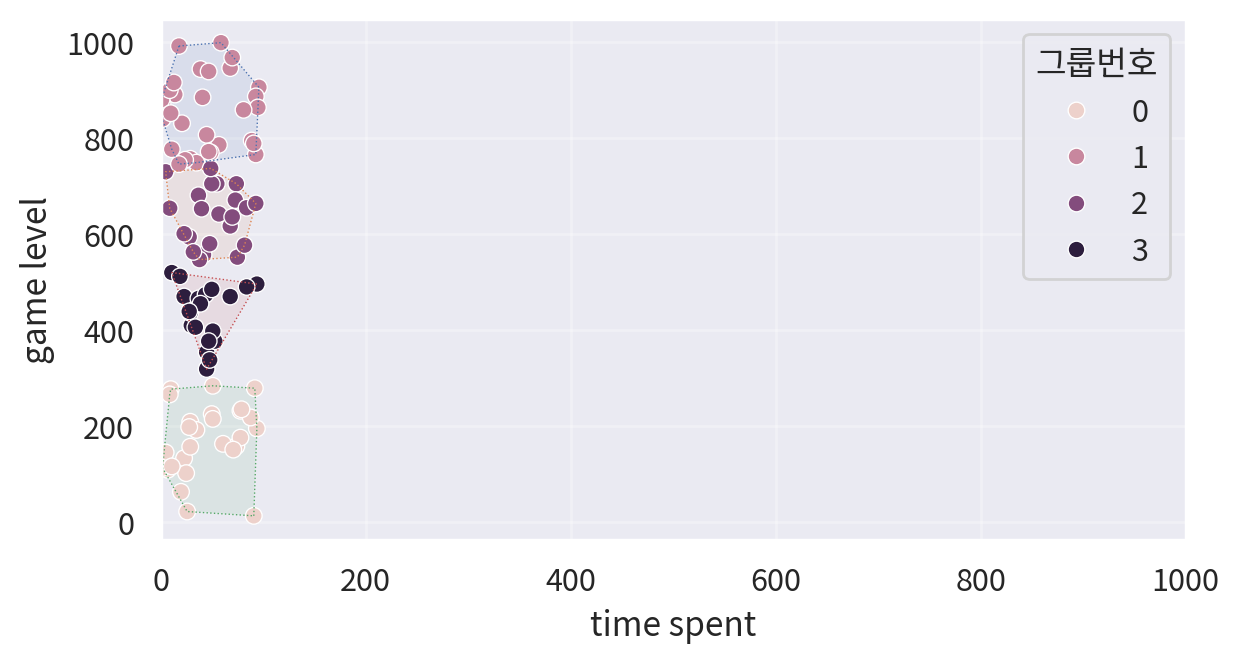

In [23]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


# 군집별 값의 종류별로 반복문 실행
for c in df['그룹번호'].unique():
  #값의 종류별로 데이터 프레임 구분
  df_c = df.loc[df['그룹번호'] == c , ['time spent','game level']]

  try:
    #외각선 좌표 계산
    hull = ConvexHull(df_c)

    #마지막 좌표 이후에 첫번쨰 좌표를 연결
    points = np.append(hull.vertices,hull.vertices[0])

    ax.plot( #type:ignore
      df_c.iloc[points,0] , df_c.iloc[points,1] , linewidth = 0.5 , linestyle =':'
      )
    
    ax.fill(df_c.iloc[points,0] , df_c.iloc[points ,1], alpha =0.1)


  except:
    pass


sb.scatterplot(data=df , x= 'time spent' , y='game level' , hue = '그룹번호')
ax.grid(True ,alpha =0.3) #배경 격자 표시
plt.tight_layout()
ax.set_xlim([0,1000])
plt.show()
plt.close()

### [2] 데이터 스케일링에 대한 군집화
#### (1) Standard Scaler

In [24]:
scaler = StandardScaler()
sdf = DataFrame (scaler.fit_transform(origin),columns=origin.columns)
sdf

,time spent,game level
0,-0.250733,1.474805
1,0.326494,0.606546
2,-0.611500,0.795456
3,0.470801,1.674613
4,-1.405187,-1.558652
...,...,...
95,0.037881,1.456640
96,0.146111,-0.192688
97,-1.188727,1.373084
98,1.192335,-1.100909


In [25]:
# 모델 객체 생성
estimator = KMeans(n_clusters=4)

#모델 학습
estimator.fit(sdf)

#예측
cluster = estimator.predict(sdf)
sdf['그룹번호'] = cluster
sdf

,time spent,game level,그룹번호
0,-0.250733,1.474805,2
1,0.326494,0.606546,1
2,-0.611500,0.795456,2
3,0.470801,1.674613,1
4,-1.405187,-1.558652,0
...,...,...,...
95,0.037881,1.456640,2
96,0.146111,-0.192688,3
97,-1.188727,1.373084,2
98,1.192335,-1.100909,3


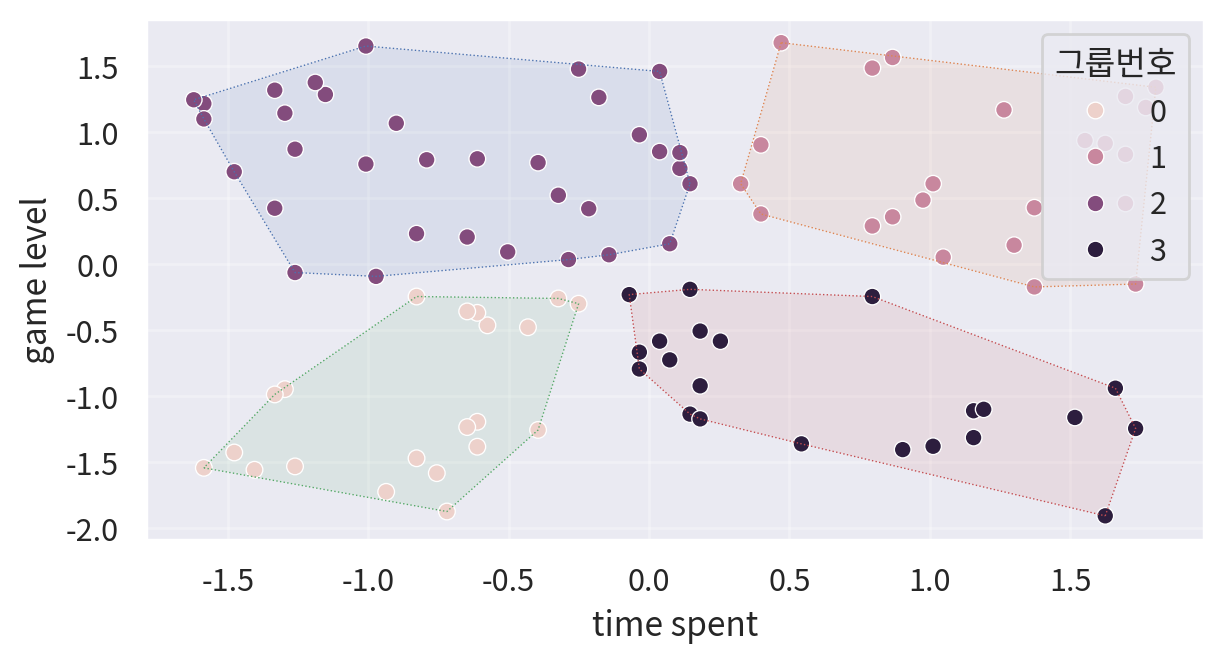

In [26]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


# 군집별 값의 종류별로 반복문 실행
for c in sdf['그룹번호'].unique():
  #값의 종류별로 데이터 프레임 구분
  df_c = sdf.loc[sdf['그룹번호'] == c , ['time spent','game level']]

  try:
    #외각선 좌표 계산
    hull = ConvexHull(df_c)

    #마지막 좌표 이후에 첫번쨰 좌표를 연결
    points = np.append(hull.vertices,hull.vertices[0])

    ax.plot( #type:ignore
      df_c.iloc[points,0] , df_c.iloc[points,1] , linewidth = 0.5 , linestyle =':'
      )
    
    ax.fill(df_c.iloc[points,0] , df_c.iloc[points ,1], alpha =0.1)


  except:
    pass


sb.scatterplot(data=sdf , x= 'time spent' , y='game level' , hue = '그룹번호')
ax.grid(True ,alpha =0.3) #배경 격자 표시
plt.tight_layout()
plt.show()
plt.close()

#### (2) MinMax Scaler

In [27]:
scaler = MinMaxScaler()
mdf = DataFrame (scaler.fit_transform(origin),columns=origin.columns)
mdf

,time spent,game level
0,0.400000,0.944219
1,0.568421,0.701826
2,0.294737,0.754564
3,0.610526,1.000000
4,0.063158,0.097363
...,...,...
95,0.484211,0.939148
96,0.515789,0.478702
97,0.126316,0.915822
98,0.821053,0.225152


In [28]:
# 모델 객체 생성
estimator = KMeans(n_clusters=4)

#모델 학습
estimator.fit(mdf)

#예측
cluster = estimator.predict(mdf)
mdf['그룹번호'] = cluster
mdf

,time spent,game level,그룹번호
0,0.400000,0.944219,1
1,0.568421,0.701826,2
2,0.294737,0.754564,1
3,0.610526,1.000000,2
4,0.063158,0.097363,3
...,...,...,...
95,0.484211,0.939148,1
96,0.515789,0.478702,0
97,0.126316,0.915822,1
98,0.821053,0.225152,0


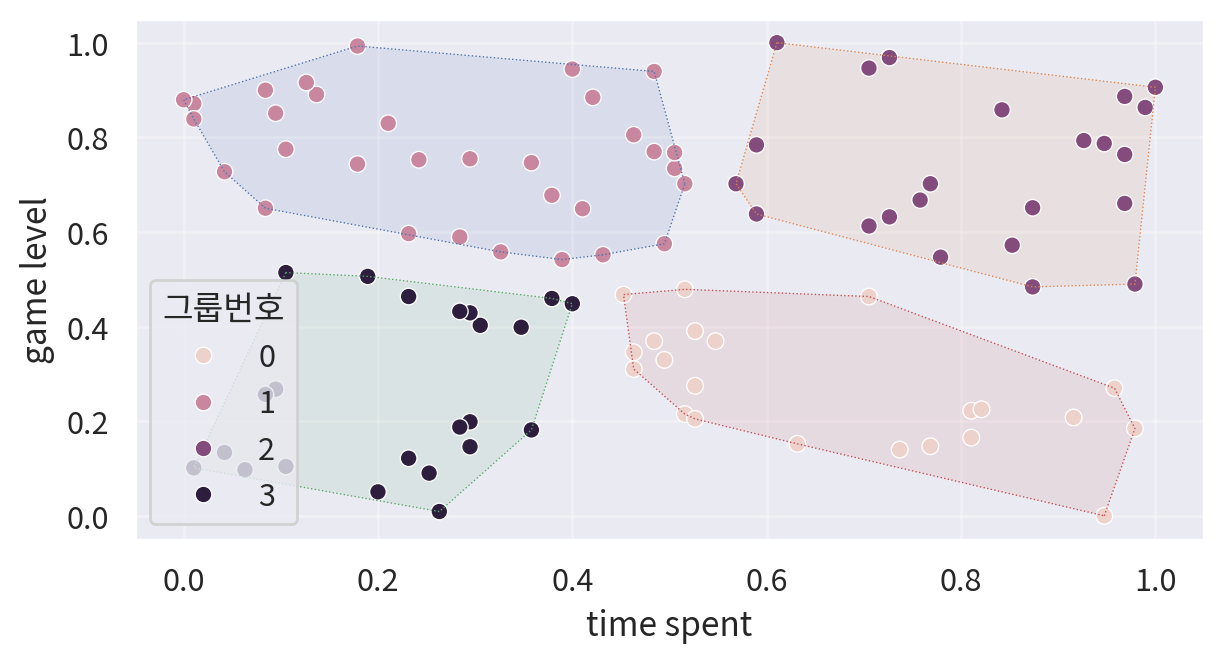

In [29]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
my_dpi=200

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)


# 군집별 값의 종류별로 반복문 실행
for c in mdf['그룹번호'].unique():
  #값의 종류별로 데이터 프레임 구분
  df_c = mdf.loc[mdf['그룹번호'] == c , ['time spent','game level']]

  try:
    #외각선 좌표 계산
    hull = ConvexHull(df_c)

    #마지막 좌표 이후에 첫번쨰 좌표를 연결
    points = np.append(hull.vertices,hull.vertices[0])

    ax.plot( #type:ignore
      df_c.iloc[points,0] , df_c.iloc[points,1] , linewidth = 0.5 , linestyle =':'
      )
    
    ax.fill(df_c.iloc[points,0] , df_c.iloc[points ,1], alpha =0.1)


  except:
    pass


sb.scatterplot(data=mdf , x= 'time spent' , y='game level' , hue = '그룹번호')
ax.grid(True ,alpha =0.3) #배경 격자 표시
plt.tight_layout()
plt.show()
plt.close()